1. 檔案讀取

In [1]:
import pandas as pd

# 讀取 CSV 檔案
df = pd.read_csv('台南公園南店.csv')

# 將缺失值填補為空字串，並確保都是文字
df['內容'] = df['內容'].fillna('').astype(str)

df

,評論時間,內容
0,8 個月前,CP值不高，服務生有時服務蠻好的，有時又有點凸槌，例如要續櫻花蝦炒飯跟他說了半小時結果又以為...
1,8 個月前,人員親切
2,8 個月前,今天來吃生日餐，服務一如既往的貼心，餐點也跟以往一樣美味
3,8 個月前,今日最滿意 深焙冰奶茶\n有點椰奶味 非常順口 …
4,8 個月前,公司春酒聚餐來訪，可能因為人數多、所以中間圓柱的大圓桌區整個是我們的，但因不是包廂、柱體也擋...
...,...,...
590,1 個月前,讚👍🏼 …
591,1 個月前,讚好吃
592,1 個月前,讚喔👍，再次來用餐！ …
593,1 天前,口味以這個價格來說中規中矩\n可能太久沒來了～沒有之前那麼有記憶點。\n但櫻花蝦炒飯一樣好吃😋 …


In [3]:
import re

# 清理特殊字符，只保留中文、英文和數字，移除所有標點符號和特殊符號
df['內容'] = df['內容'].apply(lambda x: re.sub(r'[^\u4e00-\u9fffA-Za-z0-9]', '', x))

df

,評論時間,內容
0,8 個月前,CP值不高服務生有時服務蠻好的有時又有點凸槌例如要續櫻花蝦炒飯跟他說了半小時結果又以為我剛說...
1,8 個月前,人員親切
2,8 個月前,今天來吃生日餐服務一如既往的貼心餐點也跟以往一樣美味
3,8 個月前,今日最滿意深焙冰奶茶有點椰奶味非常順口
4,8 個月前,公司春酒聚餐來訪可能因為人數多所以中間圓柱的大圓桌區整個是我們的但因不是包廂柱體也擋著所以不...
...,...,...
590,1 個月前,讚
591,1 個月前,讚好吃
592,1 個月前,讚喔再次來用餐
593,1 天前,口味以這個價格來說中規中矩可能太久沒來了沒有之前那麼有記憶點但櫻花蝦炒飯一樣好吃


2. 載入ckiptagger並指定相容環境

In [ ]:
!pip install tensorflow==2.11.0 keras==2.11.0

In [ ]:
!pip install ckiptagger

from ckiptagger import data_utils, construct_dictionary, WS, POS, NER

In [ ]:
#事先下載版
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
folder = '/content/gdrive/CKIPtagger'
ws = WS(folder)
pos = POS(folder)
ner = NER(folder)

In [7]:
sentence = [] #存句子的陣列

for line in df['內容']:
  sentence.append(line)

sentence

['CP值不高服務生有時服務蠻好的有時又有點凸槌例如要續櫻花蝦炒飯跟他說了半小時結果又以為我剛說結果櫻花蝦炒飯要等20分鐘甜點和飲料的部分是不錯主餐的話份量感覺有點少前菜和湯品的口味是不錯但是九孔鮑魚清湯和圖片感覺大小差很多如果沒有多吃炒飯和麵包的話應該是吃不飽',
 '人員親切',
 '今天來吃生日餐服務一如既往的貼心餐點也跟以往一樣美味',
 '今日最滿意深焙冰奶茶有點椰奶味非常順口',
 '公司春酒聚餐來訪可能因為人數多所以中間圓柱的大圓桌區整個是我們的但因不是包廂柱體也擋著所以不太有公司聚餐感',
 '平日中午來用餐幾乎全客滿生意很好',
 '用餐日期20240328來用餐很多次第一次想到要評論服務好餐點好主餐大推鴨胸',
 '各項都不錯蠻平均的',
 '多次來此用餐整體的服務態度跟餐點品質都相當滿意',
 '好久沒有來吃依舊經典',
 '好吃',
 '好吃',
 '好吃',
 '好吃',
 '好好吃',
 '好好吃流口水的好吃',
 '好呷',
 '好舒服的環境',
 '每年生日都會來夏慕尼吃飯慶生餐點好吃服務好氣氛也很好小朋友也有贈送餐點非常的貼心',
 '每次來吃都很開心味道都不吃',
 '來了幾次維持水準',
 '服務流貼心服務留一觀察客務需求',
 '服務好氣氛好餐點美味',
 '服務很好環境舒適',
 '服務貼心裝潢設計很舒適',
 '服務態度好',
 '服務親切',
 '服務親切料理好吃',
 '服務親切餐點好吃',
 '服務餐點好',
 '前菜蝦子鮮甜麵包酥香可口餐前白葡萄氣泡飲甜度適中又開胃都是熟悉的美味擺盤更精緻美觀以前就時常邀請親朋好友來一同聚餐會再回訪',
 '很久沒來了熟悉的裝潢令人懷念又想起小時候總是期待來夏慕尼吃大餐的興奮東西都一樣好吃麵包烤得很酥氣泡飲料也很好喝牛排是新鮮真肉的口感嚼起來噴香軟勁不是添加過多添加物精華流盡索然無味的軟脆這點很棒',
 '很棒',
 '歪超好吃',
 '美食饗宴',
 '食材新鮮美味可口精緻',
 '食材新鮮餐點的選擇很多很豐富精緻又美味',
 '值得再來的好地方',
 '夏慕尼一直是我的口袋名單第一名菜色好吃cp值高尤其是服務更好',
 '氣氛好服務佳',
 '氣氛好服務佳',
 '氣氛優雅很舒服',
 '真的很遺憾就算我也做過餐飲業知道餐飲辛苦但我真的覺得這頓飯有夠不高興我同樣也付了該有的費用

In [8]:
# 是否使用停用詞處理
USE_STOPWORDS = True

# 如果使用停用詞處理，讀取停用詞檔案
if USE_STOPWORDS:
    with open('simple_stopwords.txt', 'r', encoding='utf-8') as f:
        stopwords = set(f.read().splitlines())  # 將停用詞存為集合，方便快速查詢
else:
    stopwords = set()  # 停用詞集合設為空，不進行過濾


# 儲存斷詞結果
segment = []

# 處理每行句子
for i in sentence:
    # 去除句子中的空格
    new_i = i.replace(" ", "")

    # 斷詞
    ws_results = ws([new_i], sentence_segmentation=True)

    # 判斷是否過濾停用詞
    if USE_STOPWORDS:
        # 過濾停用詞並插入空格
        tmp = " ".join([
            str(k) for j in ws_results for k in j if k not in stopwords])
    else:
        # 不過濾停用詞，直接插入空格
        tmp = " ".join([str(k) for j in ws_results for k in j])

    # 儲存處理後的句子
    segment.append(tmp)

# 轉為DataFrame
segment_df1 = pd.DataFrame(segment, columns=["Segmented Text"])

# 顯示處理結果
print(segment_df1)

                                        Segmented Text
0    CP值 不 高 服務生 有時 服務 蠻 好 有時 又 有點 凸槌 例如 要 續 櫻花蝦 炒飯...
1                                                人員 親切
2                今天 來 吃 生 日餐 服務 一如 既往 貼心 餐點 跟 以往 一樣 美味
3                            今日 最 滿意 深 焙冰 奶茶 有點 椰奶味 順口
4    公司 春酒 聚餐 來訪 可能 人數 多所以 中間 圓柱 大 圓桌區 整 個 因 不 包廂 柱...
..                                                 ...
590                                                  讚
591                                               讚好 吃
592                                        讚 喔 再次 來 用餐
593  口味 以 個 價格 來 說 中規中矩 可能 久 沒 來 沒有 之前 那麼 有 記憶點 櫻花蝦...
594                                         氛圍 好 餐點 好吃

[595 rows x 1 columns]


In [9]:
# 否定詞列表
negation_words = {"不", "未", "無", "沒", "非", "否"}

# 次數用詞列表
frequency_words = {"每", "幾", "多", "少", "再", "氣氛", "態度", "去"}

# 儲存處理後的結果
processed_lines = []

# 對斷詞結果逐行處理
for line in segment_df1["Segmented Text"]:
    # 將每行斷詞結果轉換為列表
    words = line.split()  # 根據空格分割

    # 否定詞與次數用詞處理
    processed_words = []
    skip_next = False  # 是否跳過處理下一個詞
    for idx, word in enumerate(words):
        if skip_next:
            skip_next = False  # 跳過該詞
            continue

        # 如果當前詞是否定詞，且後面有詞
        if word in negation_words and idx + 1 < len(words):

            # 合併否定詞與下一個詞
            processed_words.append(word + words[idx + 1])
            skip_next = True  # 標記跳過下一個詞

        # 如果當前詞是次數用詞，且後面有詞
        elif word in frequency_words and idx + 1 < len(words):

            # 合併次數用詞與下一個詞
            processed_words.append(word + words[idx + 1])
            skip_next = True  # 標記跳過下一個詞
        else:
            # 正常加入詞
            processed_words.append(word)

    # 將處理後的詞列表轉換為字串
    processed_line = " ".join(processed_words)
    processed_lines.append(processed_line)

# 將處理後的結果存入 DataFrame
segment_df1["Final Processed Text"] = processed_lines

# 顯示最終結果
print(segment_df1)

# 儲存為 CSV 檔案
segment_df1.to_csv('final_processed.csv', index=False, encoding='utf-8-sig')

                                        Segmented Text  \
0    CP值 不 高 服務生 有時 服務 蠻 好 有時 又 有點 凸槌 例如 要 續 櫻花蝦 炒飯...   
1                                                人員 親切   
2                今天 來 吃 生 日餐 服務 一如 既往 貼心 餐點 跟 以往 一樣 美味   
3                            今日 最 滿意 深 焙冰 奶茶 有點 椰奶味 順口   
4    公司 春酒 聚餐 來訪 可能 人數 多所以 中間 圓柱 大 圓桌區 整 個 因 不 包廂 柱...   
..                                                 ...   
590                                                  讚   
591                                               讚好 吃   
592                                        讚 喔 再次 來 用餐   
593  口味 以 個 價格 來 說 中規中矩 可能 久 沒 來 沒有 之前 那麼 有 記憶點 櫻花蝦...   
594                                         氛圍 好 餐點 好吃   

                                  Final Processed Text  
0    CP值 不高 服務生 有時 服務 蠻 好 有時 又 有點 凸槌 例如 要 續 櫻花蝦 炒飯 ...  
1                                                人員 親切  
2                今天 來 吃 生 日餐 服務 一如 既往 貼心 餐點 跟 以往 一樣 美味  
3                            今日 最 滿意 深 焙冰 奶茶 有點 椰奶味 順口  
4    公司 春酒 聚餐 來訪 可

3. 詞頻計算、繪製文字雲

     Word  Frequency
11     服務        212
7      好吃        138
13      好        110
75     餐點        101
28      有         69
...   ...        ...
850   每小時          1
851    30          1
852   為什麼          1
853     四          1
1622   多樣          1

[1623 rows x 2 columns]


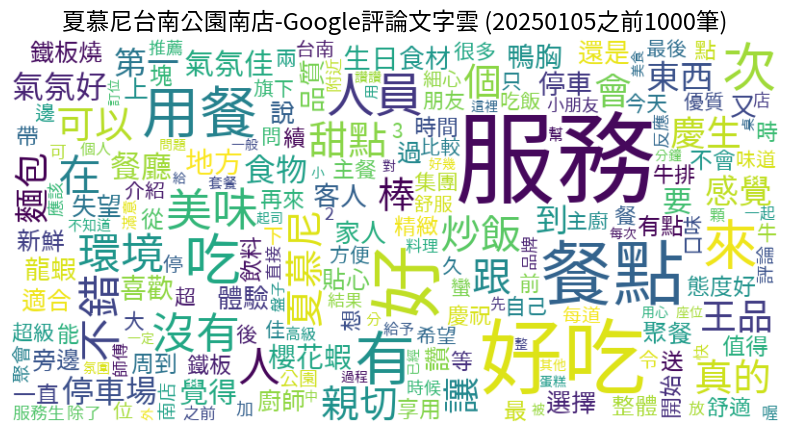

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from wordcloud import WordCloud
from matplotlib.font_manager import FontProperties

# 使用處理後的文字內容
processed_texts = segment_df1["Final Processed Text"]

# 將所有處理後的文字合併成一個大字串，並分割為詞列表
all_words = " ".join(processed_texts).split()

# 計算詞頻
word_counts = Counter(all_words)

# 將詞頻轉換為 DataFrame 以便檢視
word_freq_df = pd.DataFrame(word_counts.items(), columns=["Word", "Frequency"])
word_freq_df = word_freq_df.sort_values(by="Frequency", ascending=False)

# 顯示詞頻統計結果
print(word_freq_df)

# 儲存詞頻統計結果為 CSV 檔案
word_freq_df.to_csv("word_frequency.csv", index=False, encoding="utf-8-sig")

# 製作文字雲
wordcloud = WordCloud(
    width=800, height=400, background_color="white", font_path="TaipeiSansTCBeta-Regular.ttf"
).generate_from_frequencies(word_counts)

# 加載自己的字型
custom_font = FontProperties(fname="TaipeiSansTCBeta-Regular.ttf", size=17)

# 顯示文字雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("夏慕尼台南公園南店-Google評論文字雲 (20250105之前1000筆)", fontproperties=custom_font)
plt.show()